In [4]:
# -*- coding: utf-8 -*-
"""lab10_0.ipynb

Automatically generated by Colaboratory.

Try ANN on "Fruits" dataset. Modify number of layers and observe the performance difference:
https://www.kaggle.com/moltean/fruits

You have to generate kaggle api token and put it in current folder to work with kaggle.
"""

#To Load Dataset directly from website through API
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download moltean/fruits

! unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [6]:
path = '/content/fruits-360_dataset/fruits-360'
print('Folders :', os.listdir(path))
classes = os.listdir(path + "/Training")
print('131 classes :', classes)

Folders : ['Test', 'LICENSE', 'readme.md', 'papers', 'test-multiple_fruits', 'Training']
131 classes : ['Kiwi', 'Cherry Wax Red', 'Avocado', 'Apple Granny Smith', 'Tomato not Ripened', 'Pear', 'Redcurrant', 'Kumquats', 'Orange', 'Lychee', 'Grape Pink', 'Cherry 2', 'Mangostan', 'Grape White 3', 'Guava', 'Grape Blue', 'Pear Williams', 'Apple Golden 1', 'Peach 2', 'Melon Piel de Sapo', 'Mulberry', 'Onion Red', 'Strawberry Wedge', 'Passion Fruit', 'Eggplant', 'Chestnut', 'Pineapple Mini', 'Cantaloupe 2', 'Carambula', 'Potato Red Washed', 'Corn Husk', 'Apple Red 1', 'Banana Red', 'Peach', 'Strawberry', 'Pepper Orange', 'Apple Golden 2', 'Pear Abate', 'Cherry Rainier', 'Apple Golden 3', 'Mango', 'Apple Red 3', 'Potato Red', 'Apple Red Yellow 2', 'Tomato 3', 'Lemon Meyer', 'Grape White', 'Cactus fruit', 'Tomato Heart', 'Physalis', 'Grapefruit Pink', 'Raspberry', 'Onion Red Peeled', 'Cucumber Ripe 2', 'Tomato 4', 'Ginger Root', 'Potato Sweet', 'Salak', 'Mango Red', 'Apple Red Delicious', 'Haze

In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
dataset = ImageFolder(path + '/Training', transform=ToTensor())
print('Size of training dataset :', len(dataset))
test = ImageFolder(path + '/Test', transform=ToTensor())
print('Size of test dataset :', len(test))

Size of training dataset : 67692
Size of test dataset : 22688


In [8]:
img, label = dataset[5000]
print(img.shape)

torch.Size([3, 100, 100])


In [9]:
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Red Delicious (10)


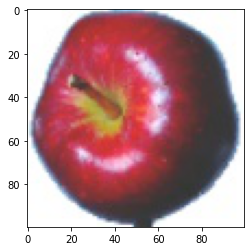

In [10]:
show_image(img, label)

In [11]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(dataset) / batch_size)
num_epochs = int(num_epochs)

In [12]:
# data loader
train_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = True, num_workers=4, pin_memory=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


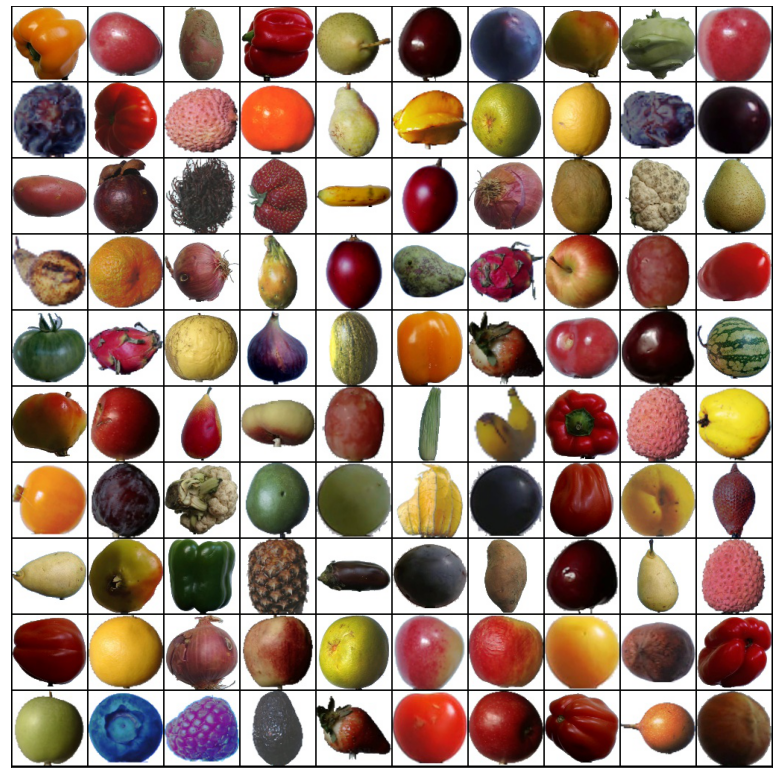

In [13]:
from torchvision.utils import make_grid
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(14,14))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))
    break

In [14]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 30000 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2 : Tanh
        self.tanh2 = nn.Tanh()
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3 ReLU
        self.relu3 = nn.ELU()
        # Linear function 4 (readout): 150 --> ?????????
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
# instantiate ANN
input_dim = 3*100*100
#hidden layer dim is one of the hyper parameter and it should be chosen and tuned.
hidden_dim = 150
output_dim = 131
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
# Cross Entropy Loss
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 3*100*100))
        labels = Variable(labels)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and cross entropy loss
        loss = error(outputs,labels)
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0

            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 3*100*100))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Iteration: 500  Loss: 3.127216100692749  Accuracy: 18.604549407958984 %
Iteration: 1000  Loss: 1.9414079189300537  Accuracy: 57.100669860839844 %
Iteration: 1500  Loss: 1.2356754541397095  Accuracy: 64.44375610351562 %
Iteration: 2000  Loss: 0.7724341750144958  Accuracy: 71.628173828125 %
Iteration: 2500  Loss: 0.5457553267478943  Accuracy: 73.76145935058594 %
Iteration: 3000  Loss: 0.5442823171615601  Accuracy: 77.86054229736328 %


KeyboardInterrupt: ignored

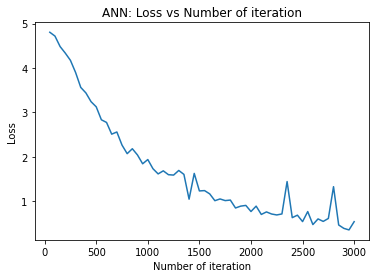

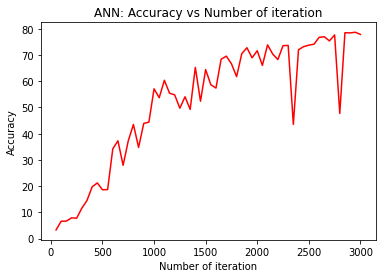

In [16]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()